In [1]:
import pandas as pd  
read=pd.read_csv('/home/hyuksu/projects/ml/project/데이터/FIN_DATA_v2.csv',encoding='utf-8')
read

,DATE_YM,STATES,SIZE,PRICE_MEDIAN,COUNTS,CPI,BASE_RATE,CPI_YOY,REAL_RATE,HOUSE_RATE,VARIABLED
0,201504,강남구,대형,128750.0,246,94.625,1.730,0.436241,1.293759,2.81,0.969868
1,201505,강남구,대형,133000.0,204,94.890,1.740,0.552088,1.187912,3.06,1.064000
2,201506,강남구,대형,131000.0,183,94.909,1.570,0.701341,0.868659,3.01,1.007692
3,201507,강남구,대형,139250.0,176,95.080,1.480,0.735279,0.744721,2.96,1.081553
4,201508,강남구,대형,135000.0,157,95.213,1.490,0.700151,0.789849,2.94,1.015038
...,...,...,...,...,...,...,...,...,...,...,...
4567,202506,중구,중형,120000.0,86,116.310,2.520,2.169712,0.350288,3.93,0.960000
4568,202507,중구,중형,115000.0,20,116.520,2.500,2.094103,0.405897,3.96,0.958333
4569,202508,중구,중형,129000.0,25,116.450,2.506,1.667540,0.838460,3.96,0.959108
4570,202509,중구,중형,137500.0,69,117.060,2.526,2.102050,0.423950,3.96,1.145833


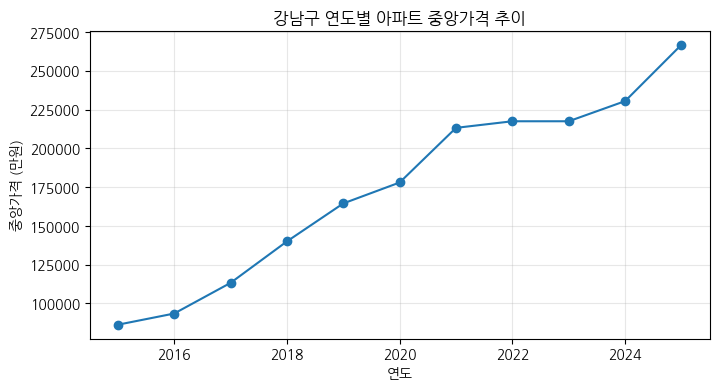

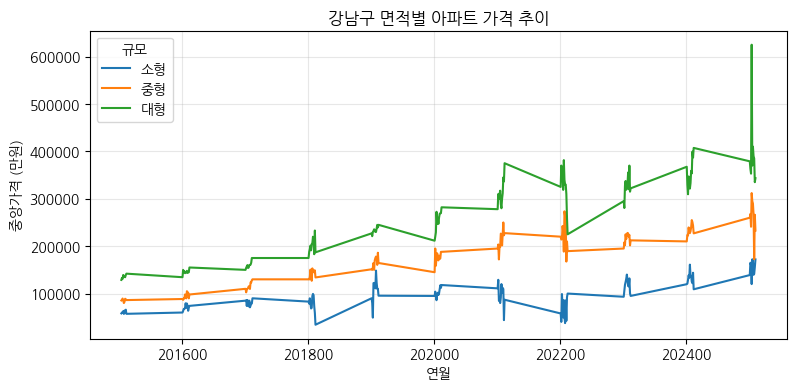

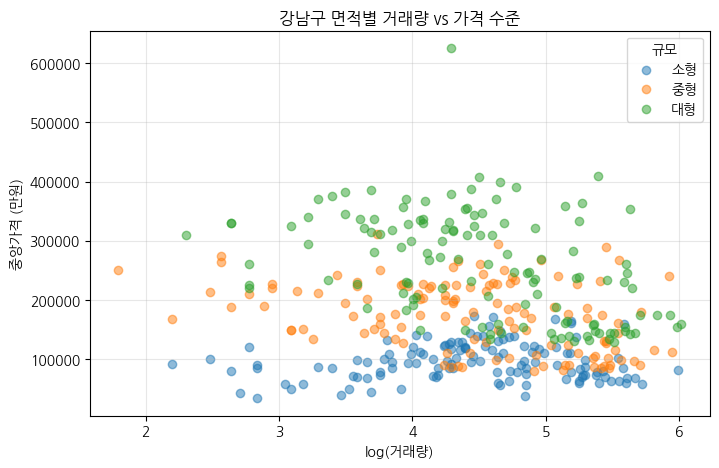

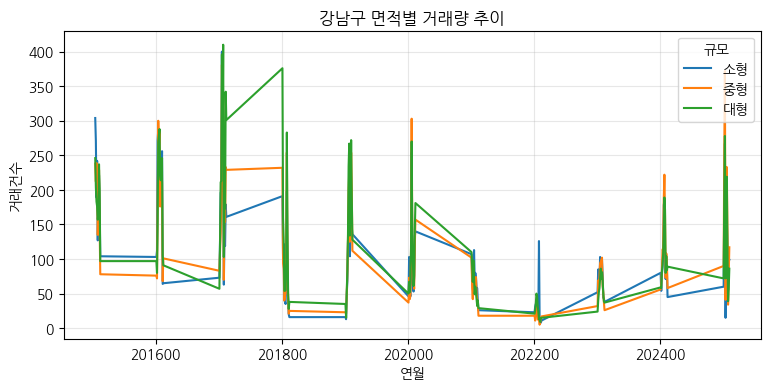

In [4]:
# ======================================
# 강남구 PRICE_MEDIAN & 거래량 EDA (복붙용)
# ======================================

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# ---------- 폰트 설정 ----------
# (WSL/Ubuntu 기준) 나눔고딕 경로가 다르면 fc-list로 확인해서 수정
FONT_PATH = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font_prop = fm.FontProperties(fname=FONT_PATH)

plt.rcParams["font.family"] = "NanumGothic"
plt.rcParams["axes.unicode_minus"] = False

# ---------- 0. 강남구 데이터 준비 ----------
df_gn = read[read["STATES"] == "강남구"].copy()

df_gn["DATE_YM"] = df_gn["DATE_YM"].astype(int)
df_gn = df_gn.sort_values("DATE_YM")

df_gn["YEAR"] = df_gn["DATE_YM"] // 100

# ---------- 1. 연도별 중앙가격 추이 ----------
yearly_price = (
    df_gn
    .groupby("YEAR")["PRICE_MEDIAN"]
    .median()
)

plt.figure(figsize=(8,4))
plt.plot(yearly_price.index, yearly_price.values, marker="o")
plt.title("강남구 연도별 아파트 중앙가격 추이")
plt.xlabel("연도")
plt.ylabel("중앙가격 (만원)")
plt.grid(True, alpha=0.3)
plt.show()

# ---------- 2. 면적별 가격 시계열 ----------
plt.figure(figsize=(9,4))

for size in ["소형", "중형", "대형"]:
    temp = df_gn[df_gn["SIZE"] == size]
    plt.plot(
        temp["DATE_YM"],
        temp["PRICE_MEDIAN"],
        label=size
    )

plt.title("강남구 면적별 아파트 가격 추이")
plt.xlabel("연월")
plt.ylabel("중앙가격 (만원)")
plt.legend(title="규모")
plt.grid(True, alpha=0.3)
plt.show()

# ---------- 3. 면적별 거래량 vs 가격 ----------
plt.figure(figsize=(8,5))

for size in ["소형", "중형", "대형"]:
    temp = df_gn[df_gn["SIZE"] == size]
    plt.scatter(
        np.log1p(temp["COUNTS"]),
        temp["PRICE_MEDIAN"],
        alpha=0.5,
        label=size
    )

plt.xlabel("log(거래량)")
plt.ylabel("중앙가격 (만원)")
plt.title("강남구 면적별 거래량 vs 가격 수준")
plt.legend(title="규모")
plt.grid(True, alpha=0.3)
plt.show()

# ---------- 4. 면적별 거래량 시계열 ----------
plt.figure(figsize=(9,4))

for size in ["소형", "중형", "대형"]:
    temp = df_gn[df_gn["SIZE"] == size]
    plt.plot(
        temp["DATE_YM"],
        temp["COUNTS"],
        label=size
    )

plt.title("강남구 면적별 거래량 추이")
plt.xlabel("연월")
plt.ylabel("거래건수")
plt.legend(title="규모")
plt.grid(True, alpha=0.3)
plt.show()


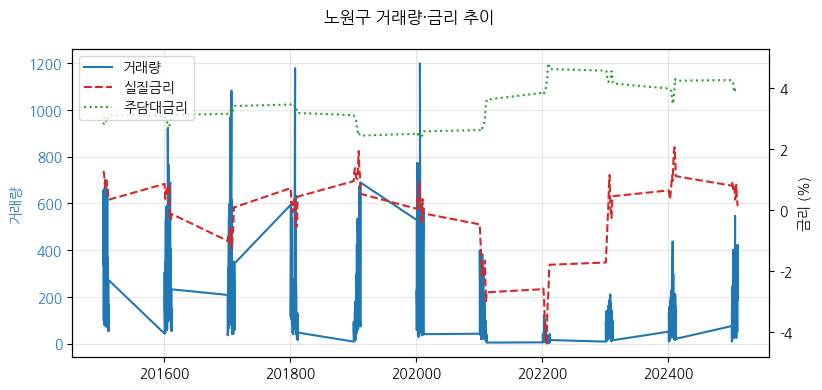

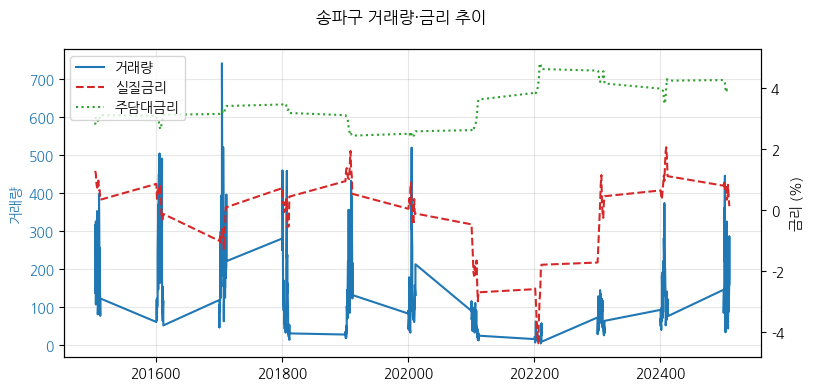

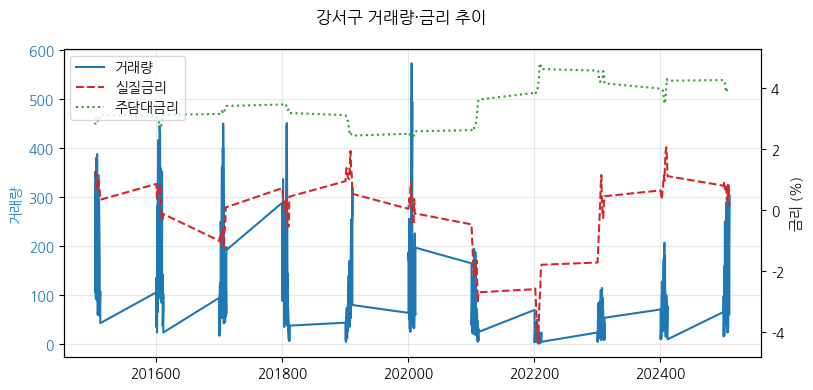

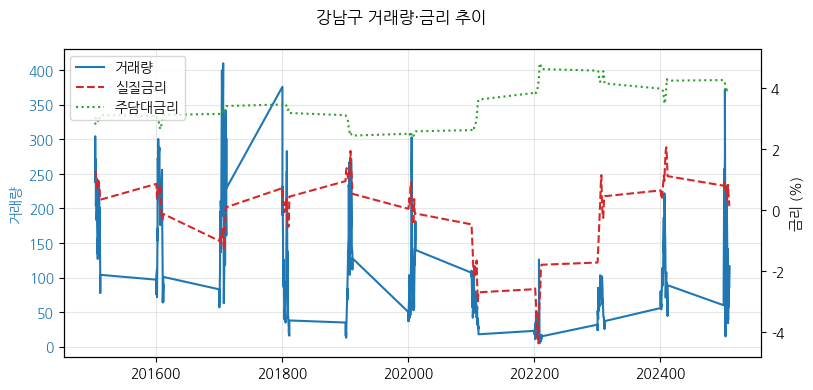

In [7]:
import matplotlib.pyplot as plt
import numpy as np

TARGET_GU = ["노원구","송파구","강서구","강남구"]  # 보고 싶은 구

df_sub = read[read["STATES"].isin(TARGET_GU)].copy()
df_sub["DATE_YM"] = df_sub["DATE_YM"].astype(int)
df_sub = df_sub.sort_values("DATE_YM")

for gu in TARGET_GU:
    temp = df_sub[df_sub["STATES"] == gu]

    fig, ax1 = plt.subplots(figsize=(9,4))

    # 거래량 (왼쪽 y축)
    ax1.plot(
        temp["DATE_YM"],
        temp["COUNTS"],
        color="tab:blue",
        label="거래량"
    )
    ax1.set_ylabel("거래량", color="tab:blue")
    ax1.tick_params(axis="y", labelcolor="tab:blue")

    # 금리 (오른쪽 y축)
    ax2 = ax1.twinx()
    ax2.plot(
        temp["DATE_YM"],
        temp["REAL_RATE"],
        color="tab:red",
        linestyle="--",
        label="실질금리"
    )
    ax2.plot(
        temp["DATE_YM"],
        temp["HOUSE_RATE"],
        color="tab:green",
        linestyle=":",
        label="주담대금리"
    )
    ax2.set_ylabel("금리 (%)")

    # 제목 / 범례
    fig.suptitle(f"{gu} 거래량·금리 추이")
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc="upper left")

    ax1.grid(True, alpha=0.3)
    plt.show()


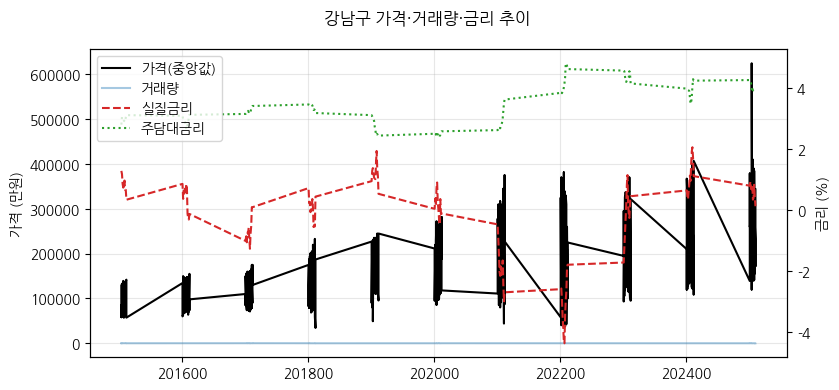

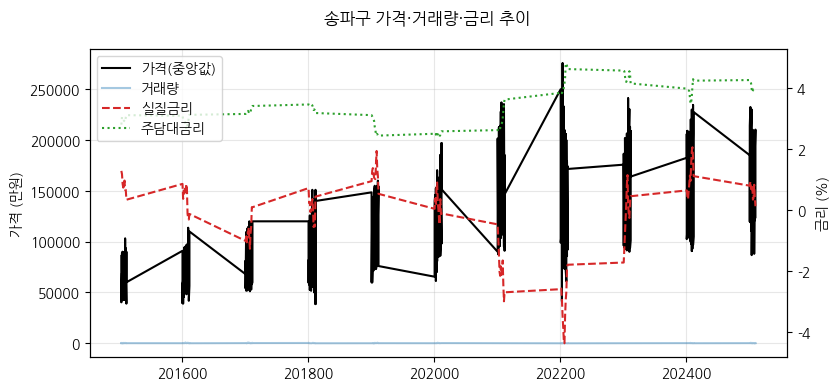

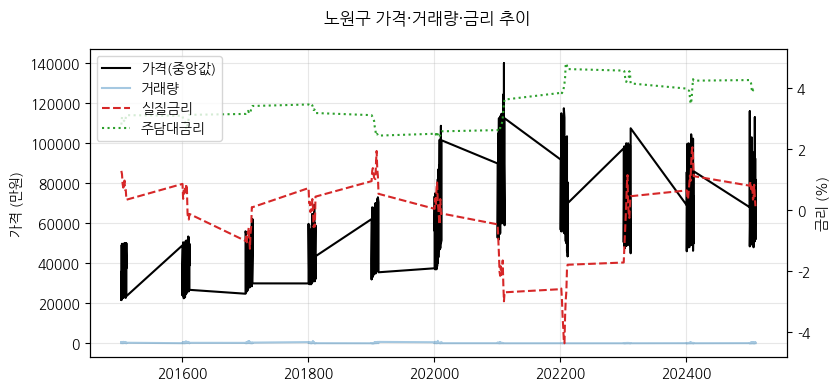

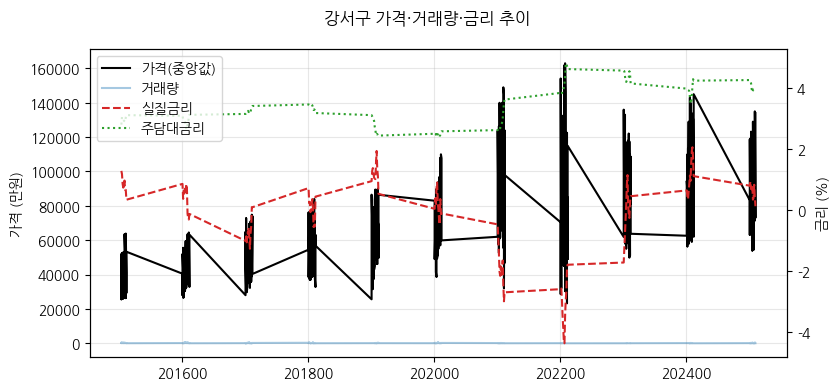

In [6]:
for gu in TARGET_GU:
    temp = df_sub[df_sub["STATES"] == gu]

    fig, ax1 = plt.subplots(figsize=(9,4))

    # 가격 (왼쪽 y축)
    ax1.plot(
        temp["DATE_YM"],
        temp["PRICE_MEDIAN"],
        color="black",
        label="가격(중앙값)"
    )
    ax1.set_ylabel("가격 (만원)")
    ax1.tick_params(axis="y")

    # 거래량 (왼쪽 보조)
    ax1.plot(
        temp["DATE_YM"],
        temp["COUNTS"],
        color="tab:blue",
        alpha=0.4,
        label="거래량"
    )

    # 금리 (오른쪽 y축)
    ax2 = ax1.twinx()
    ax2.plot(
        temp["DATE_YM"],
        temp["REAL_RATE"],
        color="tab:red",
        linestyle="--",
        label="실질금리"
    )
    ax2.plot(
        temp["DATE_YM"],
        temp["HOUSE_RATE"],
        color="tab:green",
        linestyle=":",
        label="주담대금리"
    )
    ax2.set_ylabel("금리 (%)")

    fig.suptitle(f"{gu} 가격·거래량·금리 추이")

    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

    ax1.grid(True, alpha=0.3)
    plt.show()


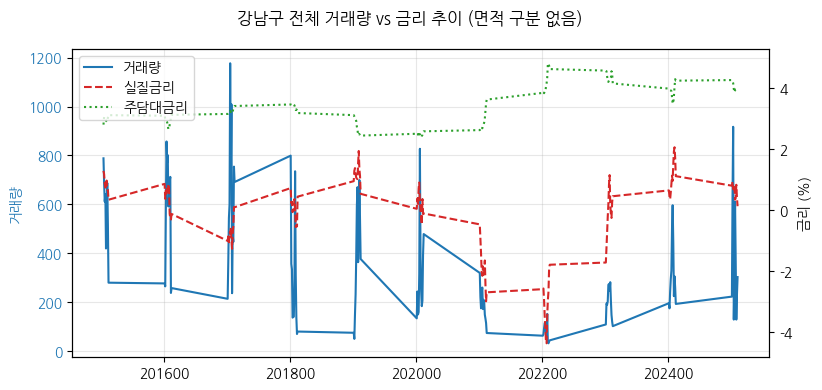

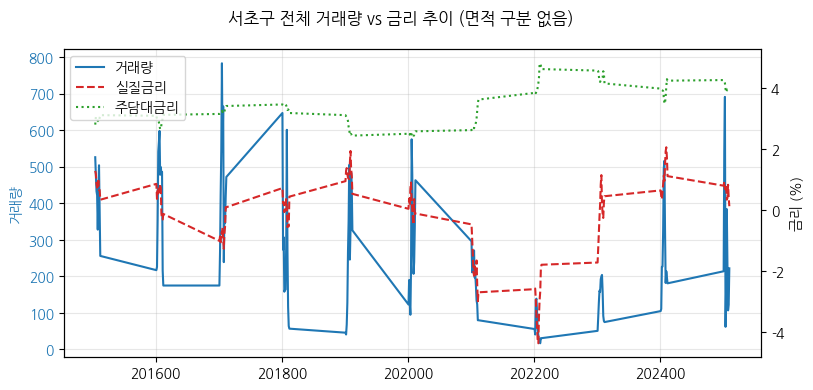

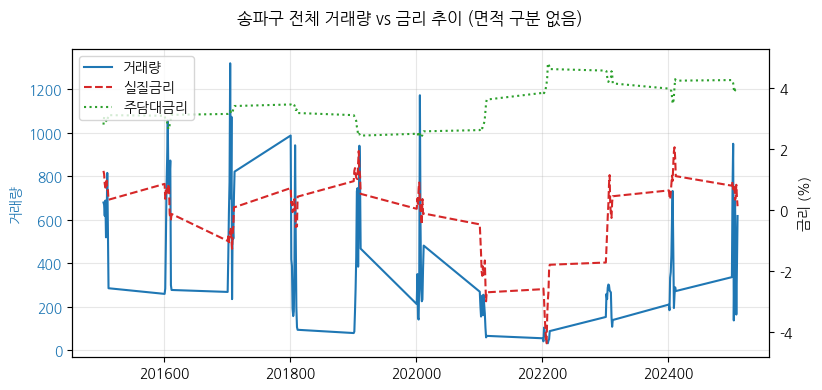

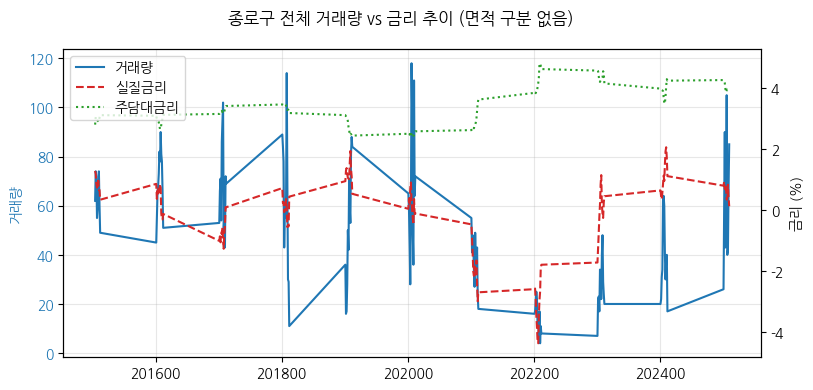

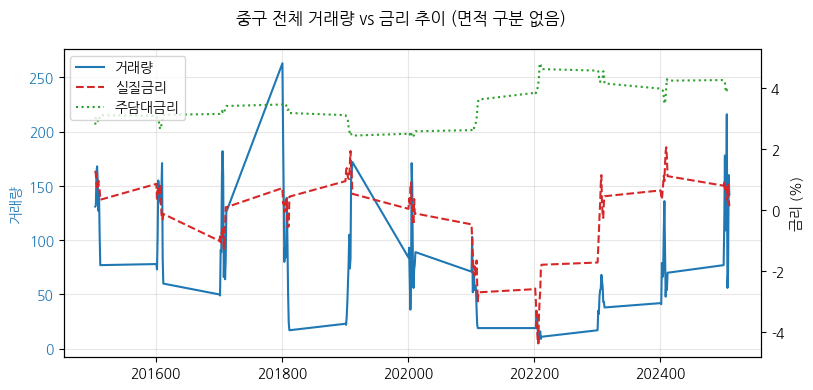

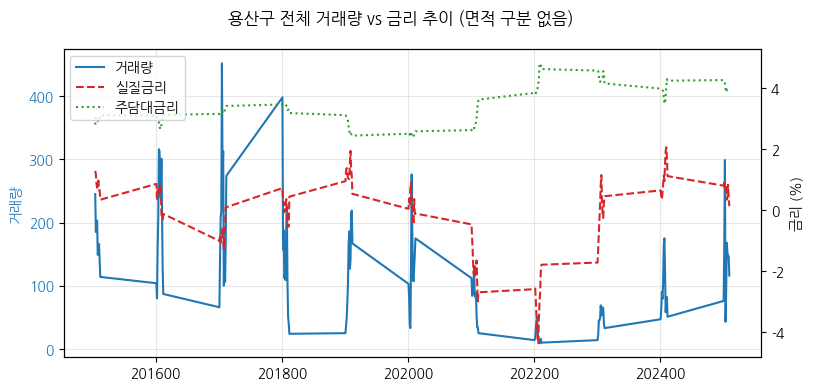

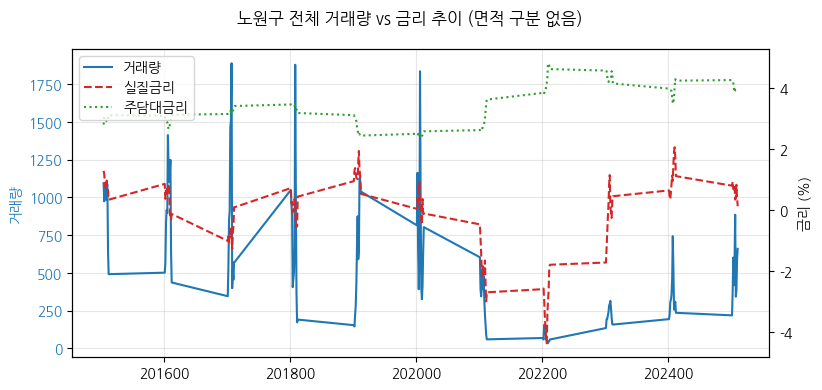

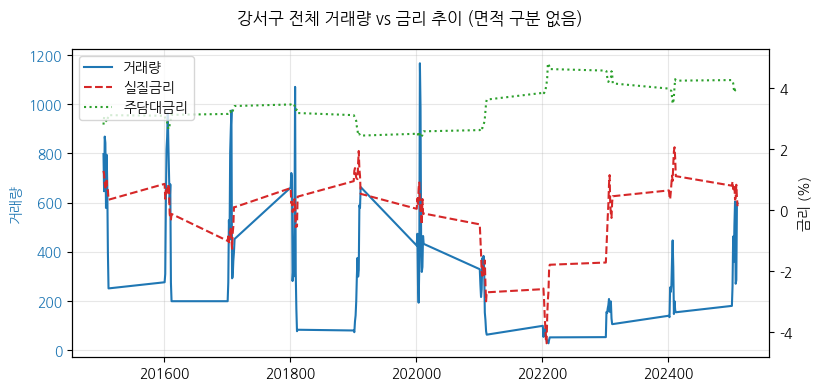

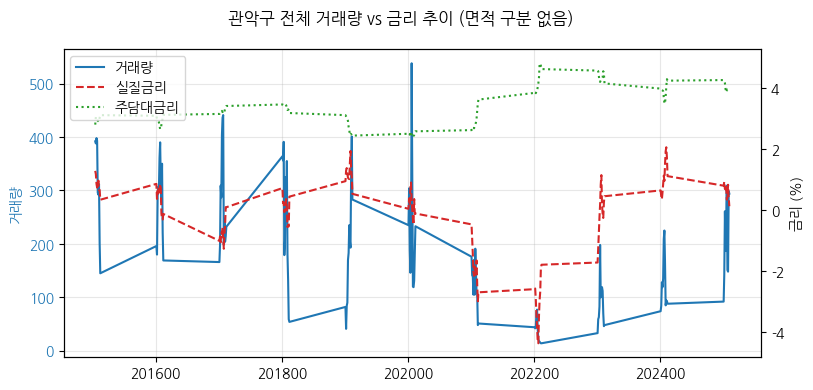

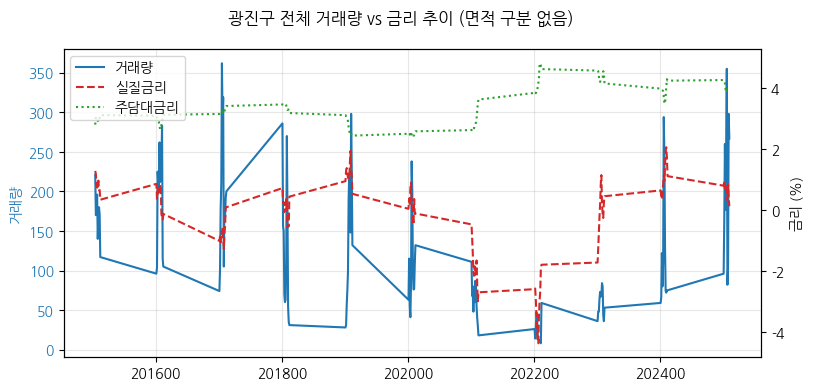

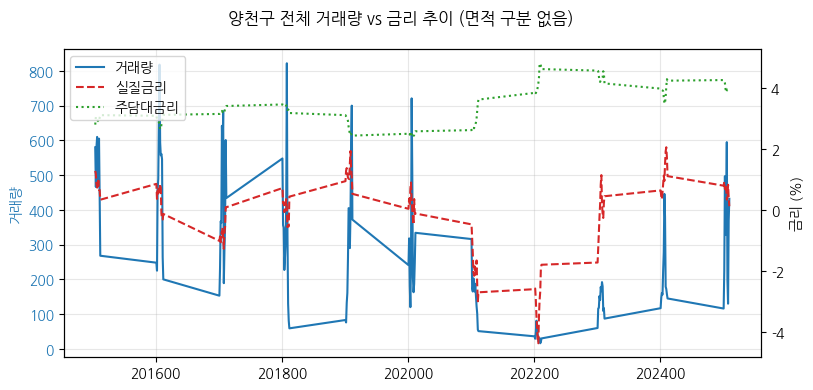

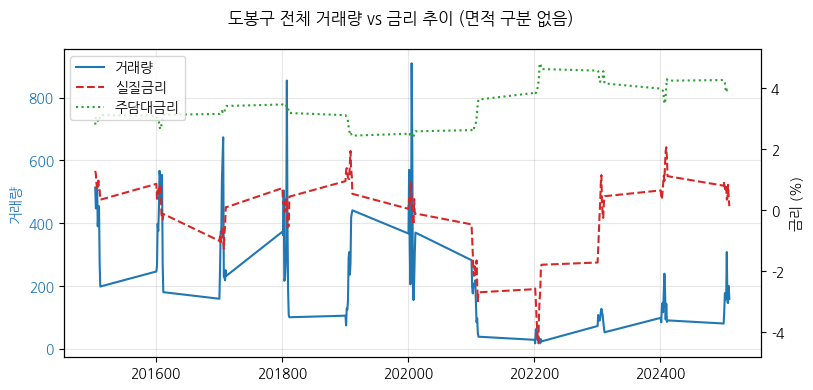

In [9]:
TARGET_GU = [
    "강남구","서초구","송파구","종로구","중구","용산구",
    "노원구","강서구","관악구","광진구","양천구","도봉구"
]
import matplotlib.pyplot as plt

df = read[read["STATES"].isin(TARGET_GU)].copy()

df["DATE_YM"] = df["DATE_YM"].astype(int)
df = df.sort_values("DATE_YM")

# 자치구 × 날짜별 집계
agg = (
    df.groupby(["STATES","DATE_YM"], as_index=False)
      .agg({
          "COUNTS": "sum",
          "REAL_RATE": "mean",
          "HOUSE_RATE": "mean"
      })
)
for gu in TARGET_GU:
    temp = agg[agg["STATES"] == gu]

    fig, ax1 = plt.subplots(figsize=(9,4))

    # 거래량 (왼쪽 y축)
    ax1.plot(
        temp["DATE_YM"],
        temp["COUNTS"],
        color="tab:blue",
        label="거래량"
    )
    ax1.set_ylabel("거래량", color="tab:blue")
    ax1.tick_params(axis="y", labelcolor="tab:blue")

    # 금리 (오른쪽 y축)
    ax2 = ax1.twinx()
    ax2.plot(
        temp["DATE_YM"],
        temp["REAL_RATE"],
        color="tab:red",
        linestyle="--",
        label="실질금리"
    )
    ax2.plot(
        temp["DATE_YM"],
        temp["HOUSE_RATE"],
        color="tab:green",
        linestyle=":",
        label="주담대금리"
    )
    ax2.set_ylabel("금리 (%)")

    # 제목 & 범례
    fig.suptitle(f"{gu} 전체 거래량 vs 금리 추이 (면적 구분 없음)")
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

    ax1.grid(True, alpha=0.3)
    plt.show()

